#### Code to test the analytical solution with constant RI and fixed severity

In [2]:
%autosave 0

Autosave disabled


In [3]:
import os
startup_file = "/Users/octavia/Dropbox/fire/src_v1/startup.py"

In [4]:
run "/Users/octavia/Dropbox/fire/src_v1/startup.py"

## Read parameter file

In [5]:
# Simulation batch
sim_dir = project_dir + "/sims_analytic_check"
file_dir = sim_dir + "/all_sims"
if os.path.isdir(file_dir)  == False:
    os.mkdir(file_dir)
    
sys.path.append(sim_dir)
if "params" in sys.modules:
    del sys.modules["params"]
from params import all_params


In [6]:
# better to run from the command line as `call_fire.py`
# all_sims = run_all_sims(all_params, file_dir)

In [7]:
all_sims = read_all_sims(file_dir)

In [8]:
res = compute_all_errors(all_sims, sim_dir, recomp = False)

In [9]:
res = pd.read_pickle(sim_dir + "/analytic_errs.pkl")

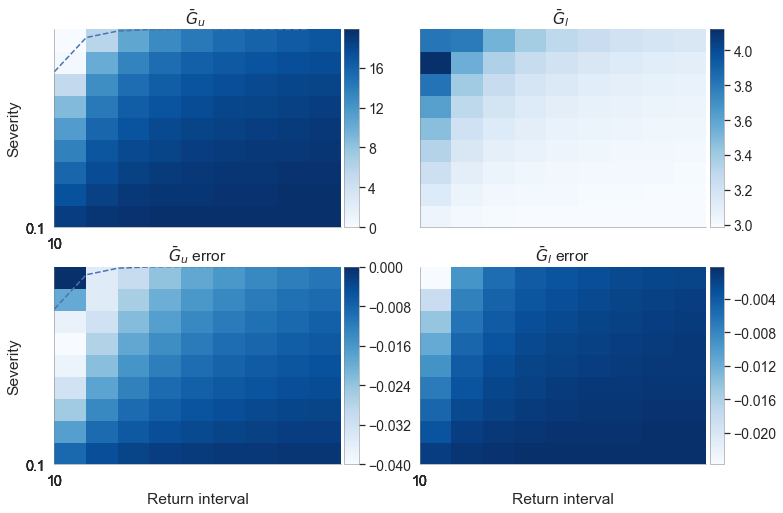

In [11]:
subset = res[(res.alpha==0.02)&(res.r_l == 1.5) & (res.beta == 0.6)]
x_var = "RI"
y_var = "severity"
subset = subset.sort_values(by = [x_var, y_var])
axes = plot_G_grid(subset, x_var, y_var)

RIs = np.unique(subset.RI)
p = RCSR(subset.iloc[0])
severities = p.max_severity(p.r_u*p.S**p.beta, RIs)
axes[0, 0].plot(RIs, severities, '--' )
axes[1, 0].plot(RIs, severities, '--' )


## Check out a high error case

In [12]:
## The errors are all acceptable
x = res["G_l_mean_e"]
cols = ["r_l", "alpha", "severity", "RI", "G_l_mean_a", "G_l_mean_c", "G_l_mean_e" ]
high_error_case = res[x == np.max(x)]
high_error_case[cols]
high_error_case.index[0]
p = all_sims.loc[high_error_case.index[0]][0]

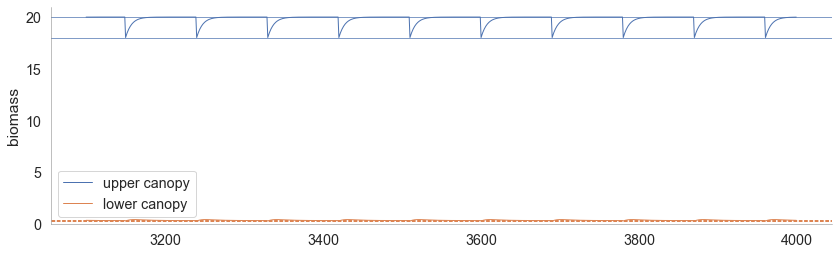

In [13]:
canopy_plot(p, 10)